<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError

from keras.utils import FeatureSpace, plot_model

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedKFold, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

In [4]:
tf.__version__

'2.17.0'

In [5]:
!apt install graphviz
import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# 1.0 Upload Data

## 1.1 Functions:

In [6]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

## **1.2 Importing the Dataset**

### **1.2.1 Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [7]:
ext_data=True

if ext_data==False:
  df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
  df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  df_test.shape

if ext_data==True:
  df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
  df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  print(df_test.shape,df_train.shape)

(3644, 669) (177024, 670)


In [8]:
df_train.p_num.value_counts()

,count
p_num,
p03,26028
p02,25872
p10,25454
p12,25299
p04,24686
p11,24555
p01,8459
p06,8383
p05,8288


In [9]:
df_train.p_num = df_train.p_num.astype("str")
df_test.p_num = df_test.p_num.astype("str")

In [10]:
df_train.head()
df_train.columns

Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
       'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30',
       ...
       'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
       'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'],
      dtype='object', length=670)

In [11]:
print(df_train.shape)
display(dict(df_train.groupby("p_num")["p_num"].count()))
display(dict(df_test.groupby("p_num")["p_num"].count()))
#display(df_train[df_train["p_num"]=="p01"].head())
#display(df_train[df_train["p_num"]=="p02"].head())

(177024, 670)


{'p01': 8459,
 'p02': 25872,
 'p03': 26028,
 'p04': 24686,
 'p05': 8288,
 'p06': 8383,
 'p10': 25454,
 'p11': 24555,
 'p12': 25299}

{'p01': 244,
 'p02': 227,
 'p04': 258,
 'p05': 276,
 'p06': 234,
 'p10': 179,
 'p11': 221,
 'p12': 288,
 'p15': 294,
 'p16': 248,
 'p18': 231,
 'p19': 246,
 'p21': 236,
 'p22': 201,
 'p24': 261}

###  **1.2.2 Data Preparation:**

Data are scaled in groups.

In [12]:
df_train.columns[-20:],df_train.columns[:20]

(Index(['activity-0:05', 'activity-0:00', 'bg+1:00', 'cluster', 'cluster_pca',
        'PC_1', 'PC_2', 'PC_3', 'enc_04_v7', 'enc_01_v1', 'enc_07_v7',
        'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7', 'enc_06_v6',
        'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'],
       dtype='object'),
 Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
        'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30', 'brake-5:25',
        'brake-5:20', 'brake-5:15', 'brake-5:10', 'brake-5:05', 'brake-5:00',
        'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40'],
       dtype='object'))

In [13]:
X_train = df_train.drop(columns=["p_num","obv_n"]).copy()
X_test = df_test.drop(columns=["p_num","obv_n"]).copy()

#X_train = df_train.drop(columns=["obv_n"]).copy()
#X_test = df_test.drop(columns=["obv_n"]).copy()

In [14]:
hr_col_train = list(df_train.filter(regex='hr').columns)
print(len(hr_col_train))

X_train = X_train.drop(columns=hr_col_train)
X_test = X_test.drop(columns=hr_col_train)

72


In [15]:
static_fields = ["hour","minute", 'cluster', 'cluster_pca',
       'PC_1', 'PC_2', 'PC_3', 'enc_04_v7', 'enc_01_v1', 'enc_07_v7',
       'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7', 'enc_06_v6',
       'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'] #"id",
target = ["bg+1:00"]
ts_fields = list(X_train.drop(columns=static_fields+target))
len(ts_fields)

576

### Scale Features

##### Target:

In [16]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled[target])

X_train[target] = target_scaler.transform(df_train[target])

In [17]:
X_test[target] = np.nan

X_train = X_train[list(X_test.columns)]

In [18]:
(X_train.columns==X_test.columns).all()

True

##### Features:

##### Define Features Datatypes:

In [19]:
X_train[["cluster","cluster_pca"]] = X_train[["cluster","cluster_pca"]].astype("int32")

In [20]:
int_cols = X_train.select_dtypes(include=['int']).columns.tolist()
float_cols = X_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

X_train[int_cols] = X_train[int_cols].astype("int32")
X_train[float_cols] = X_train[float_cols].astype("float32")
X_train[obj_cols] = X_train[obj_cols].astype("string")

X_test[int_cols] = X_test[int_cols].astype("int32")
X_test[float_cols] = X_test[float_cols].astype("float32")
X_test[obj_cols] = X_test[obj_cols].astype("string")

##### Time Features:

In [21]:
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['hour'] / 24)
X_train['minute_sin'] = np.sin(2 * np.pi * X_train['minute'] / 60)
X_train['minute_cos'] = np.cos(2 * np.pi * X_train['minute'] / 60)

X_train = X_train.drop(['hour', 'minute'], axis=1)

In [22]:
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['hour'] / 24)
X_test['minute_sin'] = np.sin(2 * np.pi * X_test['minute'] / 60)
X_test['minute_cos'] = np.cos(2 * np.pi * X_test['minute'] / 60)

X_test = X_test.drop(['hour', 'minute'], axis=1)

In [23]:
ts_fields_group = list({q[:-5] for q in ts_fields})
ts_fields_group

['activity',
 'cals_av',
 'bg',
 'brake',
 'steps_av',
 'carbs_av',
 'intake',
 'insulin_av']

In [24]:
X_train = X_train.copy()
X_test = X_test.copy()

In [25]:
X_train.shape, X_test.shape

((177024, 598), (3644, 598))

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177024 entries, p01_0 to p12_25298
Columns: 598 entries, brake-5:55 to minute_cos
dtypes: float32(592), float64(4), int32(2)
memory usage: 407.9+ MB


## **TREE MODELS**

## **XGBRegressor**

### A - XGBRegressor - No ID

#### **DATASET SELECTION**

In [27]:
X_train.shape, X_test.shape

((177024, 598), (3644, 598))

In [28]:
Xt = X_train[['hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
              'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
              'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
              "brake-0:00","intake-0:00",'steps_av-0:00']]

Xtest = X_test[['hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
                'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
                'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
                "brake-0:00","intake-0:00",'steps_av-0:00']]

y = X_train[target].copy()

In [ ]:
Xt.shape, y.shape, Xtest.shape

((177024, 25), (177024, 1), (3644, 25))

#### **FUNCTIONS**

In [ ]:
##################  OLD FUNCTION DONT USE ##################
def objective_xgb(trial, model_class, X, y, use_gpu=True, sc=target_scaler,n_splits=3,n_repeats=3):

    model_class = XGBRegressor

    categorical_features = []
    cat_bin = ['cluster_pca']
    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    params = {
    'n_estimators': 851, #trial.suggest_int('n_estimators', 100, 400, step=1),
    'learning_rate': 0.01, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
    'max_depth': trial.suggest_int('max_depth', 3, 15),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 25),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.50, 0.95, step=0.025),
    'subsample' :trial.suggest_float('subsample', .50, 0.95, step=0.025),
    'reg_lambda' : trial.suggest_float('reg_lambda', 1e-5, 1.0, log = True),
    'reg_alpha' :  trial.suggest_float('reg_alpha', 1e-5, 1.0, log = True),
    'gamma': trial.suggest_loguniform('gamma', 1e-5, 1.0),
    'random_state': 42,
    'tree_method': 'gpu_hist' if use_gpu else 'hist'}

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=61, metric_name="rmse")

    model = model_class(**params, objective='reg:squarederror', eval_metric='rmse', callbacks=[early_stop], enable_categorical="True")

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', ce.TargetEncoder(), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)], verbose=False)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for num, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipeline[:-1].fit(X_train, y_train)
        X_val_ = pipeline[:-1].transform(X_val) # Transform X_val using the same steps as X
        eval_set = [(X_val_, y_val)]
        fit_params = {'model__eval_set': eval_set, 'model__verbose': False}

        # Fit the pipeline with early stopping
        pipeline.fit(X_train, y_train, **fit_params)

        y_pred = pipeline.predict(X_val)

        y_val_ = sc.inverse_transform(y_val)
        y_pred_ = sc.inverse_transform(y_pred.reshape(-1, 1))

        print(f"Fold {num} RMSE: {np.sqrt(mean_squared_error(y_val_, y_pred_))}")
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_, y_pred_)))
        gc.collect()

    return rmse_scores[0]

In [ ]:
def objective_xgb(trial, model_class, X, y, use_gpu=True, sc=target_scaler,n_splits=3,n_repeats=3):

    model_class = XGBRegressor

    categorical_features = []
    cat_bin = ['cluster_pca']
    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    params = {
    'n_estimators': 501, #trial.suggest_int('n_estimators', 100, 400, step=1),
    'learning_rate': 0.01, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
    'max_depth': 20, #trial.suggest_int('max_depth', 12, 20),
    'min_child_weight': trial.suggest_int('min_child_weight', 8, 11),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.65, 0.75, step=0.01),
    'subsample' :trial.suggest_float('subsample', .85, 0.99, step=0.01),
    'reg_lambda' : trial.suggest_float('reg_lambda', 1e-4, 0.01, log = True),
    'reg_alpha' :  0.00025, #trial.suggest_float('reg_alpha', 1e-5, 0.01, log = True),
    'gamma': 0.00005, #trial.suggest_loguniform('gamma', 1e-5, 0.01),
    'random_state': 42,
    'tree_method': 'gpu_hist' if use_gpu else 'hist'}

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=61, metric_name="rmse")

    model = model_class(**params, objective='reg:squarederror', eval_metric='rmse', enable_categorical="True")

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', ce.TargetEncoder(), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)], verbose=False)

    kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    rmse_scores = []


    fit_params = {'verbose': False}
    cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, params=fit_params)
    gc.collect()

    return np.mean(np.abs(cv_scores))

In [ ]:
# Step 3: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, use_gpu, n_splits = 1 ,n_repeats=1):
    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
    study.optimize(lambda trial: objective_xgb(trial, model_class, Xt, y, use_gpu=use_gpu, n_splits=n_splits, n_repeats=n_splits), n_trials=n_trials)
    return study  # Return the study object

# Step 5: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [ ]:
# Step 4: Training and Evaluation
def train_and_evaluate_xgb(model_class, params, X, y, use_gpu, X_val=None, y_val=None, es=51):
    categorical_features = []
    cat_bin = ['cluster_pca']

    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', ce.TargetEncoder(), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=es, metric_name="rmse")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_class(**params, tree_method='gpu_hist' if use_gpu else 'auto',
                              callbacks=[early_stop],verbosity=0))
    ])

    # Prepare your eval_set for early stopping
    pipeline[:-1].fit(X, y)
    X_val_ = pipeline[:-1].transform(X_val) # Transform X_val using the same steps as X
    eval_set = [(X_val_, y_val)]

    # Define the fit parameters with the double underscore notation
    fit_params = {
        'model__eval_set': eval_set,
        'model__verbose': False
        }

    pipeline.fit(X, y, **fit_params)
    y_pred = pipeline.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f'RMSE on train data for {model_class.__name__}: {rmse}')

    return pipeline  # Return the pipeline for other models

#### Optuna Hyperameter Optimization:

In [ ]:
# usage with XGBRegressor
xgb_study = tune_hyperparameters(Xt, y, XGBRegressor, n_trials=11, use_gpu=False, n_splits = 3 ,n_repeats=3)
save_results(xgb_study, XGBRegressor, "XGBoost")
xgb_params = xgb_study.best_params

parameters: {'max_depth': 20, 'min_child_weight': 9, 'colsample_bytree': 0.675, 'subsample': 0.9500000000000001, 'reg_lambda': 0.0023578997094310383, 'reg_alpha': 0.0002511828751854158, 'gamma': 4.804072231366388e-05}. Best is trial 32 with value: 0.4603695107830895.

parameters: {'max_depth': 20, 'min_child_weight': 9, 'colsample_bytree': 0.7000000000000001, 'subsample': 0.925, 'reg_lambda': 0.012376109100807844, 'reg_alpha': 2.957509681090659e-05, 'gamma': 3.977885964317904e-05}. Best is trial 23 with value: 0.4604025748040941.

MSE: 0.46059680316183305
Best hyperparameters: {'min_child_weight': 8, 'colsample_bytree': 0.68, 'subsample': 0.96, 'reg_lambda': 0.09026510013760128, 'reg_alpha': 0.00014230145851307105, 'gamma': 1.1668403459546013e-05}

In [ ]:
print(xgb_params)

{'max_depth': 20, 'min_child_weight': 9, 'colsample_bytree': 0.675, 'subsample': 0.9500000000000001, 'reg_lambda': 0.0023578997094310383, 'reg_alpha': 0.0002511828751854158, 'gamma': 4.804072231366388e-05, 'learning_rate': 0.01, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'enable_categorical': 'True'}


In [ ]:
trial = xgb_study.best_trial
print('MSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
fig = optuna.visualization.plot_optimization_history(xgb_study)
fig.show()

In [ ]:
fig = optuna.visualization.plot_param_importances(xgb_study)
fig.show()

In [ ]:
#del xgb_study
gc.collect()

758

##### Train Model:

In [ ]:
xgb_params =  {'max_depth': 20, 'min_child_weight': 9, 'colsample_bytree': 0.675, 'subsample': 0.9500000000000001, 'reg_lambda': 0.0023578997094310383, 'reg_alpha': 0.0002511828751854158, 'gamma': 4.804072231366388e-05,
               'learning_rate': 0.01, "objective":'reg:squarederror', "eval_metric":'rmse', "enable_categorical":"True",'n_estimators': 501, 'learning_rate': 0.01}

n_splits=3
n_repeats = 3

test_results = pd.DataFrame(columns=list(range(n_splits*n_repeats)))
oof_results = pd.DataFrame(columns=[0,1,2], index=Xt.index)

valid_scores = pd.DataFrame(index= list(range(n_splits*n_repeats)),columns=["Model","RMSE"])

rskf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=36851234)

for i, (train_index, val_index) in enumerate(rskf.split(Xt, y)):
    print(f"Running Fold {i}")

    Xtrain, Xvalidation = Xt.iloc[train_index], Xt.iloc[val_index]
    ytrain, yvalidation = y.iloc[train_index], y.iloc[val_index]

    xgb_model = train_and_evaluate_xgb(XGBRegressor, xgb_params, Xtrain, ytrain, use_gpu=True, X_val=Xvalidation, y_val=yvalidation, es=61)
    xgb_preds = xgb_model.predict(Xvalidation)

    if i in [0,1,2]:
        oof_results.iloc[val_index, 0] = xgb_preds
    elif i in [3,4,5]:
        oof_results.iloc[val_index, 1] = xgb_preds
    elif i in [6,7,8]:
        oof_results.iloc[val_index, 2] = xgb_preds

    rmse = np.sqrt(mean_squared_error(yvalidation, xgb_preds))
    print(f'RMSE on validation data for XGBoost: {rmse}')

    test_results[i] = xgb_model.predict(Xtest)
    test_results[i] = target_scaler.inverse_transform(test_results[i].values.reshape(-1, 1))

    valid_scores.loc[i, "Model"] = f"XGBoost_{i}"
    valid_scores.loc[i, "RMSE"] = rmse

gc.collect()

Running Fold 0
RMSE on train data for XGBRegressor: 0.11673618108034134
RMSE on validation data for XGBoost: 0.4592260420322418
Running Fold 1
RMSE on train data for XGBRegressor: 0.11721456050872803
RMSE on validation data for XGBoost: 0.4568502604961395
Running Fold 2
RMSE on train data for XGBRegressor: 0.11598169803619385
RMSE on validation data for XGBoost: 0.4640818238258362
Running Fold 3
RMSE on train data for XGBRegressor: 0.11699370294809341
RMSE on validation data for XGBoost: 0.45902323722839355
Running Fold 4
RMSE on train data for XGBRegressor: 0.11697065085172653
RMSE on validation data for XGBoost: 0.4614815413951874
Running Fold 5
RMSE on train data for XGBRegressor: 0.1159450113773346
RMSE on validation data for XGBoost: 0.4597611427307129
Running Fold 6
RMSE on train data for XGBRegressor: 0.11711462587118149
RMSE on validation data for XGBoost: 0.4551757276058197
Running Fold 7
RMSE on train data for XGBRegressor: 0.11666315048933029
RMSE on validation data for XGBo

436

In [ ]:
valid_scores.plot(kind="hist")

,Model,RMSE
0,XGBoost_0,0.459226
1,XGBoost_1,0.45685
2,XGBoost_2,0.464082
3,XGBoost_3,0.459023
4,XGBoost_4,0.461482
5,XGBoost_5,0.459761
6,XGBoost_6,0.455176
7,XGBoost_7,0.462926
8,XGBoost_8,0.46095


In [ ]:
test_results.head()

,0,1,2,3,4,5,6,7,8
0,8.864378,8.889626,8.777494,8.767381,9.120420,9.225130,8.883736,8.881865,9.135478
1,6.497759,6.086907,6.356492,6.408297,6.673337,6.234703,6.264494,6.233797,6.492397
2,6.842077,6.960248,6.856095,6.418235,7.117243,6.887427,6.312277,7.049489,6.993381
3,12.027934,11.873802,11.554893,11.828679,10.972508,12.019181,11.857618,11.596288,11.947460
4,7.082322,7.023828,7.509496,7.149928,7.479289,7.236899,7.431631,7.206113,7.188193


In [ ]:
test_results.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.989351,0.989897,0.991238,0.990749,0.991468,0.991868,0.991289,0.991001
1,0.989351,1.000000,0.988748,0.991041,0.990694,0.990943,0.991184,0.990780,0.990910
2,0.989897,0.988748,1.000000,0.991336,0.990236,0.991098,0.990881,0.991514,0.990886
3,0.991238,0.991041,0.991336,1.000000,0.988101,0.989124,0.990974,0.990818,0.990850
4,0.990749,0.990694,0.990236,0.988101,1.000000,0.987796,0.990196,0.990441,0.990355
5,0.991468,0.990943,0.991098,0.989124,0.987796,1.000000,0.991281,0.990744,0.990907
6,0.991868,0.991184,0.990881,0.990974,0.990196,0.991281,1.000000,0.989071,0.988668
7,0.991289,0.990780,0.991514,0.990818,0.990441,0.990744,0.989071,1.000000,0.988626
8,0.991001,0.990910,0.990886,0.990850,0.990355,0.990907,0.988668,0.988626,1.000000


In [ ]:
test_results.max(axis=0),test_results.min(axis=0)

(0    20.955172
 1    22.849688
 2    22.686268
 3    22.218788
 4    21.489931
 5    22.945490
 6    21.956892
 7    22.041195
 8    22.030840
 dtype: float32,
 0    3.712942
 1    3.685238
 2    3.588320
 3    3.533933
 4    3.635266
 5    3.492393
 6    3.344831
 7    3.750334
 8    3.635443
 dtype: float32)

In [ ]:
#test_results.clip(2.7, 22.5, inplace=True)
test_results["average"] = test_results.mean(axis=1)
test_results.head()

,0,1,2,3,4,5,6,7,8,average
0,8.864378,8.889626,8.777494,8.767381,9.120420,9.225130,8.883736,8.881865,9.135478,8.949500
1,6.497759,6.086907,6.356492,6.408297,6.673337,6.234703,6.264494,6.233797,6.492397,6.360909
2,6.842077,6.960248,6.856095,6.418235,7.117243,6.887427,6.312277,7.049489,6.993381,6.826275
3,12.027934,11.873802,11.554893,11.828679,10.972508,12.019181,11.857618,11.596288,11.947460,11.742042
4,7.082322,7.023828,7.509496,7.149928,7.479289,7.236899,7.431631,7.206113,7.188193,7.256411
...,...,...,...,...,...,...,...,...,...,...
3639,6.729647,6.552430,6.570903,6.551657,6.675272,6.527694,6.644343,6.532883,6.617994,6.600314
3640,8.893224,9.269546,9.352654,9.335390,9.306400,9.289393,9.058059,9.369987,9.118396,9.221450
3641,7.209109,7.058663,6.904352,7.064248,7.066923,6.983134,7.001369,6.901731,7.099340,7.032096
3642,8.103235,8.104200,8.508441,7.983383,8.430386,8.106750,8.231496,8.182336,7.936767,8.176333


#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results.columns):
  sub["bg+1:00"] = test_results[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_xgbreg_v0_{col}.csv", index=False)
  print(sub.isna().sum())

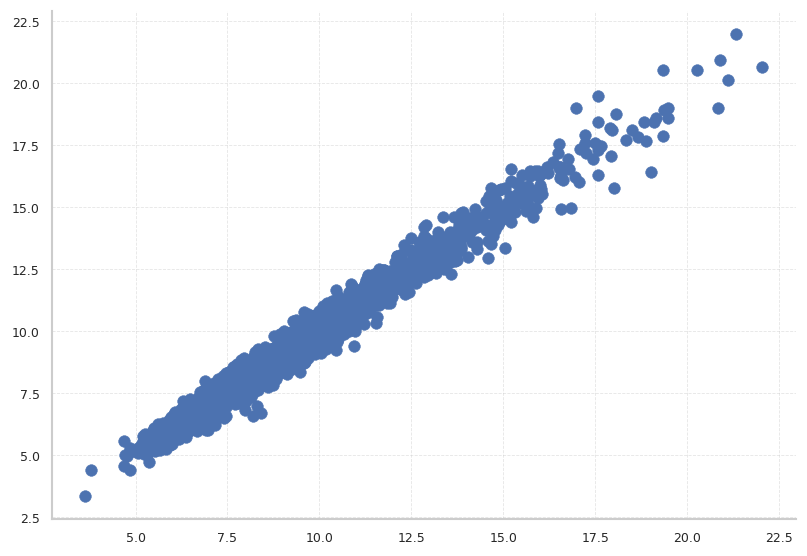

In [ ]:
plt.scatter(test_results[8],test_results[6])

### B - XGBRegressor - WITH ID

#### **DATASET SELECTION**

In [29]:
X_train = df_train.drop(columns=["obv_n"]).copy()
X_test = df_test.drop(columns=["obv_n"]).copy()

### Scale Features

##### Target:

In [30]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled[target])

X_train[target] = target_scaler.transform(df_train[target])

In [31]:
X_test[target] = np.nan

X_train = X_train[list(X_test.columns)]

In [32]:
(X_train.columns==X_test.columns).all()

True

##### Features:

##### Define Features Datatypes:

In [33]:
X_train[["cluster","cluster_pca"]] = X_train[["cluster","cluster_pca"]].astype("int32")

In [34]:
int_cols = X_train.select_dtypes(include=['int']).columns.tolist()
float_cols = X_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

X_train[int_cols] = X_train[int_cols].astype("int32")
X_train[float_cols] = X_train[float_cols].astype("float32")
X_train[obj_cols] = X_train[obj_cols].astype("string")

X_test[int_cols] = X_test[int_cols].astype("int32")
X_test[float_cols] = X_test[float_cols].astype("float32")
X_test[obj_cols] = X_test[obj_cols].astype("string")

##### Time Features:

In [35]:
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['hour'] / 24)
X_train['minute_sin'] = np.sin(2 * np.pi * X_train['minute'] / 60)
X_train['minute_cos'] = np.cos(2 * np.pi * X_train['minute'] / 60)

X_train = X_train.drop(['hour', 'minute'], axis=1)

In [36]:
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['hour'] / 24)
X_test['minute_sin'] = np.sin(2 * np.pi * X_test['minute'] / 60)
X_test['minute_cos'] = np.cos(2 * np.pi * X_test['minute'] / 60)

X_test = X_test.drop(['hour', 'minute'], axis=1)

In [37]:
X_train.shape, X_test.shape

((177024, 671), (3644, 671))

In [38]:
Xt = X_train[["p_num",'hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
              'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
              'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
              "brake-0:00","intake-0:00",'steps_av-0:00']]

Xtest = X_test[["p_num",'hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
                'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
                'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
                "brake-0:00","intake-0:00",'steps_av-0:00']]

y = X_train[target].copy()

In [39]:
Xt.shape, y.shape, Xtest.shape

((177024, 26), (177024, 1), (3644, 26))

#### **FUNCTIONS**

In [40]:
# ##################  OLD FUNCTION DONT USE ##################
# def objective_xgb(trial, model_class, X, y, use_gpu=True, sc=target_scaler,n_splits=3,n_repeats=3):

#     model_class = XGBRegressor

#     categorical_features = []
#     cat_bin = ['cluster_pca']
#     tot_cat = categorical_features + cat_bin
#     numeric_features = [col for col in X.columns if col not in tot_cat]

#     params = {
#     'n_estimators': 851, #trial.suggest_int('n_estimators', 100, 400, step=1),
#     'learning_rate': 0.01, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
#     'max_depth': trial.suggest_int('max_depth', 3, 15),
#     'min_child_weight': trial.suggest_int('min_child_weight', 1, 25),
#     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.50, 0.95, step=0.025),
#     'subsample' :trial.suggest_float('subsample', .50, 0.95, step=0.025),
#     'reg_lambda' : trial.suggest_float('reg_lambda', 1e-5, 1.0, log = True),
#     'reg_alpha' :  trial.suggest_float('reg_alpha', 1e-5, 1.0, log = True),
#     'gamma': trial.suggest_loguniform('gamma', 1e-5, 1.0),
#     'random_state': 42,
#     'tree_method': 'gpu_hist' if use_gpu else 'hist'}

#     # Create the early stopping callback
#     early_stop = EarlyStopping(rounds=61, metric_name="rmse")

#     model = model_class(**params, objective='reg:squarederror', eval_metric='rmse', callbacks=[early_stop], enable_categorical="True")

#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('cat', ce.TargetEncoder(), categorical_features),
#             ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
#             ('num', StandardScaler(), numeric_features)
#         ])

#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('model', model)], verbose=False)

#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
#     rmse_scores = []

#     for num, (train_idx, val_idx) in enumerate(kf.split(X, y)):
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

#         pipeline[:-1].fit(X_train, y_train)
#         X_val_ = pipeline[:-1].transform(X_val) # Transform X_val using the same steps as X
#         eval_set = [(X_val_, y_val)]
#         fit_params = {'model__eval_set': eval_set, 'model__verbose': False}

#         # Fit the pipeline with early stopping
#         pipeline.fit(X_train, y_train, **fit_params)

#         y_pred = pipeline.predict(X_val)

#         y_val_ = sc.inverse_transform(y_val)
#         y_pred_ = sc.inverse_transform(y_pred.reshape(-1, 1))

#         print(f"Fold {num} RMSE: {np.sqrt(mean_squared_error(y_val_, y_pred_))}")
#         rmse_scores.append(np.sqrt(mean_squared_error(y_val_, y_pred_)))
#         gc.collect()

#     return rmse_scores[0]

In [48]:
def objective_xgb(trial, model_class, X, y, use_gpu=True, sc=target_scaler,n_splits=3,n_repeats=3):

    model_class = XGBRegressor

    categorical_features = ["p_num"]
    cat_bin = ['cluster_pca']
    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    params = {
    'n_estimators': 501, #trial.suggest_int('n_estimators', 100, 400, step=1),
    'learning_rate': 0.01, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
    'max_depth': trial.suggest_int('max_depth', 15, 19),
    'min_child_weight': trial.suggest_int('min_child_weight', 7, 12),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.60, 0.975, step=0.025),
    'subsample' :trial.suggest_float('subsample', 0.65, 0.975, step=0.025),
    'reg_lambda' : trial.suggest_float('reg_lambda', 1e-5, 1.0, log = True),
    'reg_alpha' :  trial.suggest_float('reg_alpha', 1e-5, 1.0, log = True),
    'gamma': trial.suggest_loguniform('gamma', 1e-5, 1.0),
    'random_state': 42,
    'tree_method': 'gpu_hist' if use_gpu else 'hist'}

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=61, metric_name="rmse")

    model = model_class(**params, objective='reg:squarederror', eval_metric='rmse', enable_categorical=True)

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop=None,sparse_output=False,handle_unknown="ignore"), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)], verbose=False)

    kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    rmse_scores = []


    fit_params = {'model__verbose': False}
    cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, params=fit_params)
    gc.collect()

    return np.mean(np.abs(cv_scores))

In [49]:
# Step 3: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, use_gpu, n_splits = 1 ,n_repeats=1):
    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
    study.optimize(lambda trial: objective_xgb(trial, model_class, Xt, y, use_gpu=use_gpu, n_splits=n_splits, n_repeats=n_splits), n_trials=n_trials)
    return study  # Return the study object

# Step 5: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [57]:
# Step 4: Training and Evaluation
def train_and_evaluate_xgb(model_class, params, X, y, use_gpu, X_val=None, y_val=None, es=51):
    categorical_features = ["p_num"]
    cat_bin = ['cluster_pca']

    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop=None,sparse_output=False,handle_unknown="ignore"), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=es, metric_name="rmse")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_class(**params, tree_method='gpu_hist' if use_gpu else 'auto',
                              callbacks=[early_stop],verbosity=0))
    ])

    # Prepare your eval_set for early stopping
    pipeline[:-1].fit(X, y)
    X_val_ = pipeline[:-1].transform(X_val) # Transform X_val using the same steps as X
    eval_set = [(X_val_, y_val)]

    # Define the fit parameters with the double underscore notation
    fit_params = {
        'model__eval_set': eval_set,
        'model__verbose': False
        }

    pipeline.fit(X, y, **fit_params)
    y_pred = pipeline.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f'RMSE on train data for {model_class.__name__}: {rmse}')

    return pipeline  # Return the pipeline for other models

#### Optuna Hyperameter Optimization:

In [51]:
# usage with XGBRegressor
xgb_study = tune_hyperparameters(Xt, y, XGBRegressor, n_trials=101, use_gpu=True, n_splits = 3 ,n_repeats=3)
save_results(xgb_study, XGBRegressor, "XGBoost")
xgb_params = xgb_study.best_params

[I 2024-10-31 21:05:41,830] A new study created in memory with name: no-name-9c1bd625-d9a0-434a-9cea-26156c22c026
[I 2024-10-31 21:10:44,677] Trial 0 finished with value: 0.47222009632322526 and parameters: {'max_depth': 15, 'min_child_weight': 10, 'colsample_bytree': 0.675, 'subsample': 0.725, 'reg_lambda': 0.04276572139846992, 'reg_alpha': 0.0020126585744890913, 'gamma': 0.0024460510643378084}. Best is trial 0 with value: 0.47222009632322526.
[I 2024-10-31 21:17:22,591] Trial 1 finished with value: 0.4660825828711192 and parameters: {'max_depth': 19, 'min_child_weight': 11, 'colsample_bytree': 0.875, 'subsample': 0.55, 'reg_lambda': 0.003247752749491121, 'reg_alpha': 0.05603453951285458, 'gamma': 0.0018153143484660507}. Best is trial 1 with value: 0.4660825828711192.
[I 2024-10-31 21:22:23,515] Trial 2 finished with value: 0.48805214299096 and parameters: {'max_depth': 17, 'min_child_weight': 11, 'colsample_bytree': 0.525, 'subsample': 0.55, 'reg_lambda': 0.029528905940671753, 'reg_a

KeyboardInterrupt: 


Trial 8 finished with value: 0.45646969477335614 and parameters: {'max_depth': 16, 'min_child_weight': 5, 'colsample_bytree': 0.575, 'subsample': 0.975, 'reg_lambda': 0.1261973030024609, 'reg_alpha': 0.027407077964036634, 'gamma': 0.0022360261432867127}.

Best is trial 8 with value: 0.45646969477335614.

Trial 23 finished with value: 0.45253756642341614 and parameters: {'max_depth': 18, 'min_child_weight': 7, 'colsample_bytree': 0.725, 'subsample': 0.925, 'reg_lambda': 0.015464843850475033, 'reg_alpha': 7.72686346766841e-05, 'gamma': 0.00037255375792082405}. Best is trial 23 with value: 0.45253756642341614.

In [52]:
print(xgb_params)

NameError: name 'xgb_params' is not defined

In [53]:
trial = xgb_study.best_trial
print('MSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

NameError: name 'xgb_study' is not defined

In [ ]:
fig = optuna.visualization.plot_optimization_history(xgb_study)
fig.show()

In [ ]:
fig = optuna.visualization.plot_param_importances(xgb_study)
fig.show()

In [54]:
#del xgb_study
gc.collect()

952

##### Train Model:

In [58]:
xgb_params =  {'max_depth': 18, 'min_child_weight': 7, 'colsample_bytree': 0.725, 'subsample': 0.925, 'reg_lambda': 0.015464843850475033,
               'reg_alpha': 7.72686346766841e-05, 'gamma': 0.00037255375792082405,
               'learning_rate': 0.01, "objective":'reg:squarederror', "eval_metric":'rmse', "enable_categorical":"True",'n_estimators': 501, 'learning_rate': 0.01}

n_splits=3
n_repeats = 3

test_results = pd.DataFrame(columns=list(range(n_splits*n_repeats)))
oof_results = pd.DataFrame(columns=[0,1,2], index=Xt.index)

valid_scores = pd.DataFrame(index= list(range(n_splits*n_repeats)),columns=["Model","RMSE"])

rskf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=36851234)

for i, (train_index, val_index) in enumerate(rskf.split(Xt, y)):
    print(f"Running Fold {i}")

    Xtrain, Xvalidation = Xt.iloc[train_index], Xt.iloc[val_index]
    ytrain, yvalidation = y.iloc[train_index], y.iloc[val_index]

    xgb_model = train_and_evaluate_xgb(XGBRegressor, xgb_params, Xtrain, ytrain, use_gpu=True, X_val=Xvalidation, y_val=yvalidation, es=61)
    xgb_preds = xgb_model.predict(Xvalidation)

    if i in [0,1,2]:
        oof_results.iloc[val_index, 0] = xgb_preds
    elif i in [3,4,5]:
        oof_results.iloc[val_index, 1] = xgb_preds
    elif i in [6,7,8]:
        oof_results.iloc[val_index, 2] = xgb_preds

    rmse = np.sqrt(mean_squared_error(yvalidation, xgb_preds))
    print(f'RMSE on validation data for XGBoost: {rmse}')

    test_results[i] = xgb_model.predict(Xtest)
    test_results[i] = target_scaler.inverse_transform(test_results[i].values.reshape(-1, 1))

    valid_scores.loc[i, "Model"] = f"XGBoost_{i}"
    valid_scores.loc[i, "RMSE"] = rmse

gc.collect()

Running Fold 0
RMSE on train data for XGBRegressor: 0.11411558836698532
RMSE on validation data for XGBoost: 0.4502304792404175
Running Fold 1
RMSE on train data for XGBRegressor: 0.11514218151569366
RMSE on validation data for XGBoost: 0.44882524013519287
Running Fold 2
RMSE on train data for XGBRegressor: 0.11358048766851425
RMSE on validation data for XGBoost: 0.4547847807407379
Running Fold 3
RMSE on train data for XGBRegressor: 0.11470779776573181
RMSE on validation data for XGBoost: 0.4501573443412781
Running Fold 4
RMSE on train data for XGBRegressor: 0.11477424949407578
RMSE on validation data for XGBoost: 0.45238372683525085
Running Fold 5
RMSE on train data for XGBRegressor: 0.11390995979309082
RMSE on validation data for XGBoost: 0.45179036259651184
Running Fold 6
RMSE on train data for XGBRegressor: 0.11488252878189087
RMSE on validation data for XGBoost: 0.44606247544288635
Running Fold 7
RMSE on train data for XGBRegressor: 0.1143011823296547
RMSE on validation data for X

235

In [59]:
valid_scores

,Model,RMSE
0,XGBoost_0,0.45023
1,XGBoost_1,0.448825
2,XGBoost_2,0.454785
3,XGBoost_3,0.450157
4,XGBoost_4,0.452384
5,XGBoost_5,0.45179
6,XGBoost_6,0.446062
7,XGBoost_7,0.454293
8,XGBoost_8,0.452198


In [63]:
test_results.head()

,0,1,2,3,4,5,6,7,8
0,9.110393,9.076495,8.518119,8.820892,8.800200,9.052337,9.097649,9.096400,9.129179
1,6.783676,6.064743,6.361112,6.572038,6.521139,6.440116,6.417992,6.331359,6.744920
2,7.120949,7.557723,7.210855,6.754886,8.099631,7.194632,6.804250,7.889266,7.436102
3,11.929959,12.159980,11.733474,12.610150,11.039387,12.336898,12.031880,11.822555,11.891953
4,7.339856,7.219595,7.575348,7.452945,7.455370,7.764957,7.605700,7.677027,7.300260


In [64]:
test_results.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.988809,0.989512,0.991041,0.991067,0.990397,0.990810,0.990731,0.990607
1,0.988809,1.000000,0.988137,0.990463,0.990855,0.990329,0.990396,0.990318,0.990072
2,0.989512,0.988137,1.000000,0.991046,0.990090,0.990691,0.990275,0.990648,0.990877
3,0.991041,0.990463,0.991046,1.000000,0.988695,0.988562,0.990447,0.990424,0.990608
4,0.991067,0.990855,0.990090,0.988695,1.000000,0.988107,0.990522,0.990470,0.990068
5,0.990397,0.990329,0.990691,0.988562,0.988107,1.000000,0.990087,0.989865,0.990582
6,0.990810,0.990396,0.990275,0.990447,0.990522,0.990087,1.000000,0.988062,0.987892
7,0.990731,0.990318,0.990648,0.990424,0.990470,0.989865,0.988062,1.000000,0.987465
8,0.990607,0.990072,0.990877,0.990608,0.990068,0.990582,0.987892,0.987465,1.000000


In [65]:
test_results.max(axis=0),test_results.min(axis=0)

(0    21.681139
 1    22.895224
 2    23.427145
 3    22.394354
 4    21.524782
 5    23.280235
 6    22.717485
 7    22.433027
 8    22.378763
 dtype: float32,
 0    3.906731
 1    3.832840
 2    3.775346
 3    3.718249
 4    3.719651
 5    3.744162
 6    3.533857
 7    3.869938
 8    3.682108
 dtype: float32)

In [66]:
#test_results.clip(2.7, 22.5, inplace=True)
test_results["average"] = test_results.mean(axis=1)
test_results.head()

,0,1,2,3,4,5,6,7,8,average
0,9.110393,9.076495,8.518119,8.820892,8.800200,9.052337,9.097649,9.096400,9.129179,8.966851
1,6.783676,6.064743,6.361112,6.572038,6.521139,6.440116,6.417992,6.331359,6.744920,6.470788
2,7.120949,7.557723,7.210855,6.754886,8.099631,7.194632,6.804250,7.889266,7.436102,7.340922
3,11.929959,12.159980,11.733474,12.610150,11.039387,12.336898,12.031880,11.822555,11.891953,11.950693
4,7.339856,7.219595,7.575348,7.452945,7.455370,7.764957,7.605700,7.677027,7.300260,7.487896


#### **STORE RESULTS**

In [67]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [68]:
for i, col in enumerate(test_results.columns):
  sub["bg+1:00"] = test_results[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_xgbreg_v1_{col}_id.csv", index=False)
  print(sub.isna().sum())

id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64


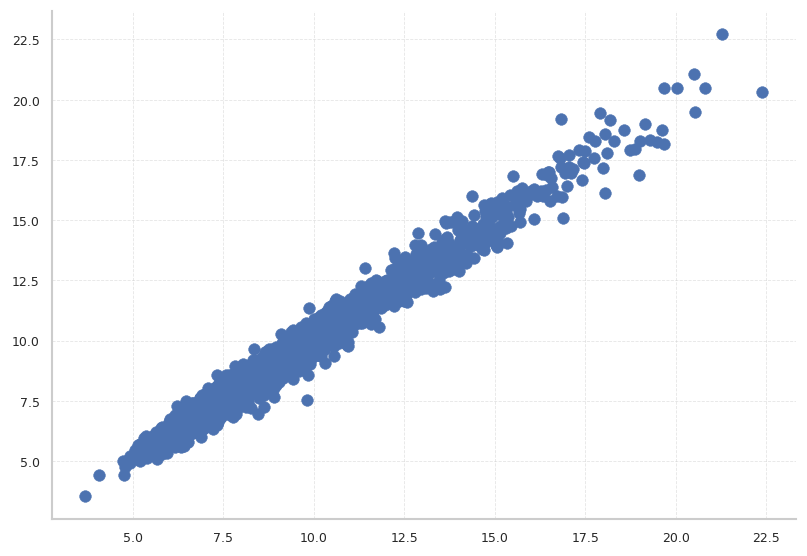

In [69]:
plt.scatter(test_results[8],test_results[6])

### **B - LGBMRegressor**

#### **DATASET SELECTION**

In [ ]:
X_train.shape, X_test.shape

((177024, 598), (3644, 598))

In [ ]:
Xt = X_train[['hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
              'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
              'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
              "brake-0:00","intake-0:00",'steps_av-0:00']]

Xtest = X_test[['hour_sin','hour_cos','minute_sin','minute_cos', 'cluster_pca','PC_1', 'PC_2', 'PC_3',
                'enc_04_v7', 'enc_01_v1', 'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
                'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6',"bg-0:00", "insulin_av-0:00",
                "brake-0:00","intake-0:00",'steps_av-0:00']]

y = X_train[target].copy()

In [ ]:
Xt.shape, y.shape, Xtest.shape

((177024, 25), (177024, 1), (3644, 25))

#### **FUNCTIONS**

In [ ]:
def objective_lgbm(trial, model_class, X, y, use_gpu=True, sc=target_scaler,n_splits=3,n_repeats=3):

    model_class = LGBMRegressor

    categorical_features = []
    cat_bin = ['cluster_pca']
    tot_cat = categorical_features + cat_bin
    numeric_features = [col for col in X.columns if col not in tot_cat]

    params = {
    'num_leaves':         trial.suggest_int('num_leaves', 31, 111, step=5),
    'n_estimators':       201, #trial.suggest_int('n_estimators', 250, 800),
    'learning_rate':      0.01, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
    'min_child_samples':  trial.suggest_int('min_child_samples', 20, 70, step=1),
    #'min_child_weight' :  trial.suggest_float("min_child_weight", 1e-2, 1.0, log=True),
    "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
    "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
    "max_depth" :         trial.suggest_int('max_depth', 5, 20, step=1),
    #'max_bin' :           trial.suggest_int('max_bin', 401, 501, step=5),
    'colsample_bytree':   trial.suggest_float("colsample_bytree", 0.50, 1.0, step=0.05),
    'subsample':          trial.suggest_float("subsample", 0.5, 1.0, step=0.025),
    'random_state':       42,
    'force_col_wise':     True,
    'device':             "cpu"
    }

    # Create the early stopping callback
    early_stop = EarlyStopping(rounds=61, metric_name="rmse")

    model = model_class(**params, objective='regression')

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop=None,sparse_output=False,handle_unknown="ignore"), categorical_features),
            ('cat_bin', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"), cat_bin),
            ('num', StandardScaler(), numeric_features)
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)], verbose=False)

    kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    rmse_scores = []


    fit_params = {'verbose': False}
    cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, params=fit_params)
    gc.collect()

    return np.mean(np.abs(cv_scores))